# Projetão da Percepção

In [ ]:
# ////////////////////////////////////////////////
#   CLASSE PERCEPTRON (IMPLEMENTAÇÃO MANUAL)
# ///////////////////////////////////////////////

import numpy as np

class MyPerceptron:

    def __init__(self, no_of_inputs, threshold=100, learning_rate=0.01):
        self.no_of_inputs = no_of_inputs
        self.threshold = threshold
        self.learning_rate = learning_rate
        # +1 por causa do bias
        self.weights = np.zeros(no_of_inputs + 1)

    def predict(self, inputs):
        # inputs é array: [x1, x2]
        # adiciona o bias como input fixo = 1
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        # função de ativação Heaviside
        return 1 if summation >= 0 else 0

    def train(self, training_inputs, labels):
        # repete várias iterações (threshold)
        for _ in range(self.threshold):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction

                # atualização dos pesos
                self.weights[1:] += self.learning_rate * error * inputs
                # atualização do bias (input fixo = 1)
                self.weights[0] += self.learning_rate * error
        return self.weights

## Aplicação no dataset Iris (comprimento e largura da pétala)

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, (2,3)]            # comprimento e largura da pétala
y = (iris.target == 0).astype(int) # 1 = setosa, 0 = não-setosa

perceptron = MyPerceptron(no_of_inputs=2, threshold=50, learning_rate=0.1)
perceptron.train(X, y)

print("Pesos aprendidos:", perceptron.weights)

# Testando o processo:
pred = perceptron.predict([1, 0.5])
print("Previsão de classe:", pred)

Pesos aprendidos: [ 0.2  -0.06 -0.08]
Previsão de classe: 1


## Comparação com o Perceptron do scikit-learn

In [ ]:
from sklearn.linear_model import Perceptron as SKPerceptron

skp = SKPerceptron(max_iter=1000)
skp.fit(X, y)

print("Scikit-learn previu:", skp.predict([[1, 0.5]])[0])

Scikit-learn previu: 1


## Outro exemplo simples em que o Perceptron funciona

In [ ]:
# OR lógico
X_or = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y_or = np.array([0, 1, 1, 1])

p_or = MyPerceptron(2, threshold=20, learning_rate=0.1)
p_or.train(X_or, y_or)

print("Previsões OR:")
for x in X_or:
    print(x, "->", p_or.predict(x))

Previsões OR:
[0 0] -> 0
[0 1] -> 1
[1 0] -> 1
[1 1] -> 1


## Quando o Perceptron (modelo) falha?

Ele falha quando o problema não é linearmente separável, abaixo um exemplo dessa situação.

In [ ]:
# Erro XOR

X_xor = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y_xor = np.array([0,1,1,0])  # impossível separar com uma linha reta

p_xor = MyPerceptron(2, threshold=50, learning_rate=0.1)
p_xor.train(X_xor, y_xor)

print("Previsões XOR:")
for x in X_xor:
    print(x, "->", p_xor.predict(x))


Previsões XOR:
[0 0] -> 1
[0 1] -> 1
[1 0] -> 0
[1 1] -> 0


Abaixo um exemplo em que falha, mostrando um dataset que é impossível separar linearmente (XOR), uma vez que, o modelo nunca consegue acertar o padrão, mesmo com sigmoid.

In [ ]:
X_xor = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y_xor = np.array([0,1,1,0])

model_fail = MyPerceptronSigmoid(2, learning_rate=0.1, epochs=500)
model_fail.train(X_xor, y_xor)

preds = [model_fail.predict(x) for x in X_xor]

print("Predições no XOR:", preds)
print("Labels verdadeiros:", y_xor)


Predições no XOR: [1, 0, 0, 0]
Labels verdadeiros: [0 1 1 0]


## Perceptron com função de ativação SIGMOID + treinamento por GRADIENT DESCENT

In [ ]:
import numpy as np

class MyPerceptronSigmoid:

    def __init__(self, no_of_inputs, learning_rate=0.1, epochs=500):
        self.no_of_inputs = no_of_inputs
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.zeros(no_of_inputs + 1)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict_raw(self, inputs):
        z = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return z

    def predict(self, inputs):
        z = self.predict_raw(inputs)
        return 1 if self.sigmoid(z) >= 0.5 else 0

    def train(self, X, y):
        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                z = self.predict_raw(xi)
                pred = self.sigmoid(z)
                error = target - pred

                # Gradiente da função sigmoid
                grad = pred * (1 - pred)

                # Atualização dos pesos
                self.weights[1:] += self.learning_rate * error * grad * xi
                self.weights[0] += self.learning_rate * error * grad

## Separando treino e teste com train_test_split + medindo acurácia

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model_sig = MyPerceptronSigmoid(2, learning_rate=0.1, epochs=500)
model_sig.train(X_train, y_train)

y_pred = [model_sig.predict(x) for x in X_test]
acc = accuracy_score(y_test, y_pred)

print("Acurácia com Perceptron Sigmoid:", acc)

Acurácia com Perceptron Sigmoid: 1.0


## Plotando a fronteira de decisão

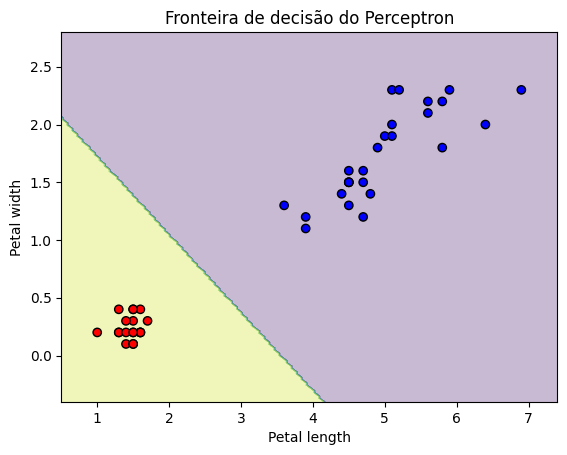

In [ ]:
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = np.array([model.predict(point) for point in grid])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, cmap="bwr", edgecolors="k")
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
    plt.title("Fronteira de decisão do Perceptron")
    plt.show()

plot_decision_boundary(model_sig, X_test, y_test)

## Comparação direta com scikit-learn usando mesma divisão treino/teste

In [ ]:
from sklearn.linear_model import Perceptron

sk_model = Perceptron()
sk_model.fit(X_train, y_train)

y_sk = sk_model.predict(X_test)
acc_sk = accuracy_score(y_test, y_sk)

print("Acurácia do scikit-learn:", acc_sk)

Acurácia do scikit-learn: 1.0
